# Diffusion

This notebook illustrates the classification of the nodes of a graph by [diffusion](https://scikit-network.readthedocs.io/en/latest/reference/classification.html), based on the labels of a few nodes.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.classification import DiffusionClassifier, BiDiffusionClassifier
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

## Graphs

**Loading**

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

**Classification**

In [5]:
seeds = {i: labels_true[i] for i in [0, 33]}

In [6]:
diffusion = DiffusionClassifier()
labels_pred = diffusion.fit_transform(adjacency, seeds)

In [7]:
precision = np.round(np.mean(labels_pred == labels_true), 2)
precision

0.97

**Visualization**

In [8]:
image = svg_graph(adjacency, position, labels=labels_pred, seeds=seeds)

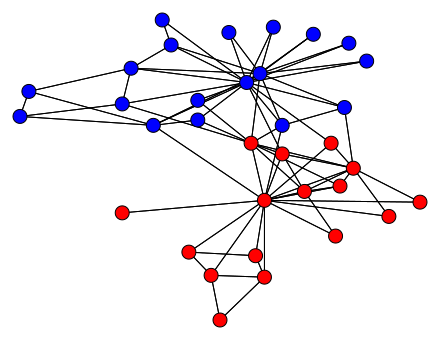

In [9]:
SVG(image)

**Soft classification**

In [10]:
membership = diffusion.membership_

In [20]:
scores = membership[:,1].toarray().ravel()

**Visualization**

In [21]:
image = svg_graph(adjacency, position, scores=scores, seeds=seeds)

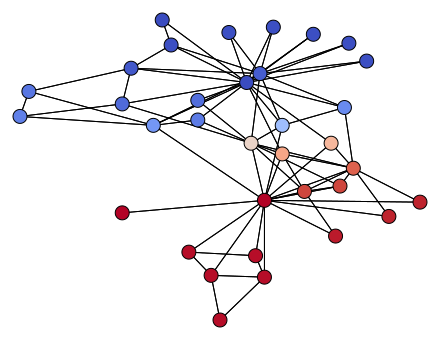

In [22]:
SVG(image)

## Digraphs

**Loading**

In [25]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

**Classification**

In [26]:
rembrandt = 5
klimt = 6
cezanne = 11
seeds = {cezanne: 0, rembrandt: 1, klimt: 2}

In [27]:
diffusion = DiffusionClassifier()
labels_pred = diffusion.fit_transform(adjacency, seeds)

**Visualization**

In [28]:
image = svg_digraph(adjacency, position, names=names, labels=labels_pred, seeds=seeds)

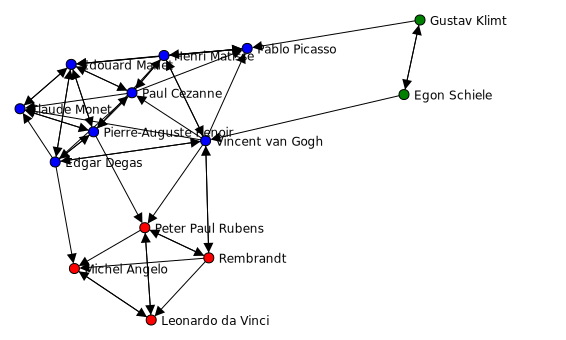

In [29]:
SVG(image)

**Soft classification**

In [33]:
membership = diffusion.membership_

In [37]:
scores = membership[:,0].toarray().ravel()

**Visualization**

In [38]:
image = svg_digraph(adjacency, position, names=names, scores=scores, seeds=[cezanne])

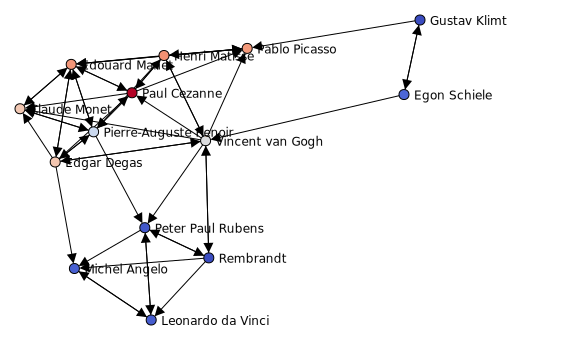

In [39]:
SVG(image)

## Bigraphs

**Loading**

In [41]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

**Classification**

In [42]:
inception = 0
drive = 3
budapest = 8

In [43]:
seeds = {inception: 0, drive: 1, budapest: 2}

In [49]:
bidiffusion = BiDiffusionClassifier()
bidiffusion.fit(biadjacency, seeds)
labels = bidiffusion.labels_

**Visualization**

In [53]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row=labels, seeds_row=seeds, color_col = 'white')

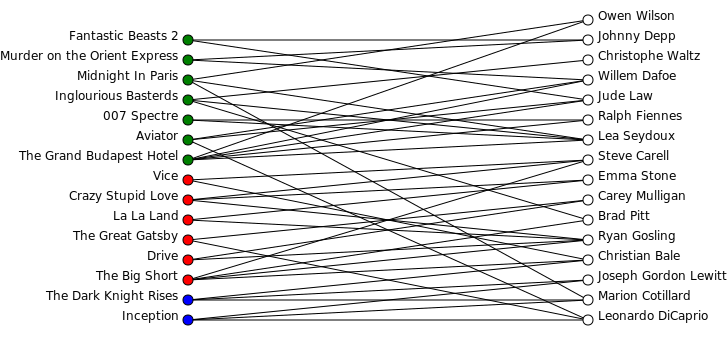

In [54]:
SVG(image)